In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


1. **Calcolo delle statistiche di base:**
   - Calcola la media, la mediana, la deviazione standard e il massimo della lunghezza della pinna per ogni specie di pinguino.

2. **Selezione dei dati:**
   - Seleziona i dati solo per i pinguini di sesso maschile e plotta un grafico a dispersione tra l'altezza del becco e il peso.

3. **Filtraggio dei dati:**
   - Filtra i dati per pinguini che hanno una lunghezza del becco superiore alla media della lunghezza del becco e una lunghezza della pinna inferiore alla media della lunghezza della pinna.

4. **Raggruppamento e aggregazione:**
   - Raggruppa i dati per isola e calcola la somma dei pesi totali dei pinguini su ciascuna isola.

5. **Confronto tra isole:**
   - Confronta la distribuzione delle lunghezze della pinna tra i pinguini delle diverse isole utilizzando un grafico a barre.

6. **Correlazione tra caratteristiche:**
   - Calcola la correlazione tra la lunghezza del becco e il peso dei pinguini e visualizza i risultati.

7. **Analisi di distribuzione:**
   - Plotta un istogramma della lunghezza del becco per ogni specie di pinguino.

8. **Visualizzazione avanzata:**
   - Crea un grafico a dispersione 3D che rappresenti la lunghezza del becco, la lunghezza della pinna e il peso dei pinguini.

9. **Raggruppamento per specie e isola:**
   - Raggruppa i dati per specie e isola, quindi calcola la media della lunghezza della pinna.

10. **Confronto tra specie:**
    - Plotta un grafico a barre che mostra la media della lunghezza del becco per ciascuna specie di pinguino.


1. **Calcolo delle statistiche di base:**
   - Calcola la media, la mediana, la deviazione standard e il massimo della lunghezza della pinna per ogni specie di pinguino.


In [104]:
data=pd.read_csv("./penguins_size.csv")
data_puliti=data.dropna()
data_puliti

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [92]:
data_puliti=data[["flipper_length_mm", "species"]].dropna()
data_puliti.groupby("species").mean()

,flipper_length_mm
species,
Adelie,189.953642
Chinstrap,195.823529
Gentoo,217.186992


In [12]:
data_puliti[["flipper_length_mm", "species"]].groupby("species").std()

,flipper_length_mm
species,
Adelie,6.521825
Chinstrap,7.131894
Gentoo,6.557738


In [13]:
data_puliti[["flipper_length_mm", "species"]].groupby("species").max()

,flipper_length_mm
species,
Adelie,210.0
Chinstrap,212.0
Gentoo,231.0


2. **Selezione dei dati:**
   - Seleziona i dati solo per i pinguini di sesso maschile e plotta un grafico a dispersione tra l'altezza del becco e il peso.

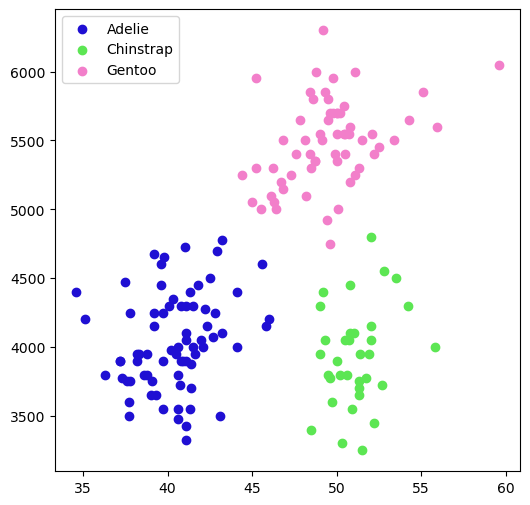

In [111]:
maschi=data[data["sex"]=="MALE"].copy()
maschi_puliti=maschi[["culmen_length_mm", "body_mass_g", "species"]].dropna()
fig, ax=plt.subplots(figsize=(6,6))
for specie in data_puliti["species"].unique():
    x=maschi_puliti[maschi_puliti["species"]==specie]["culmen_length_mm"].values
    y=maschi_puliti[maschi_puliti["species"]==specie]["body_mass_g"].values

    ax.scatter(x, y, color=np.random.uniform(0,1 ,3), label=specie)
ax.legend()
plt.show()

3. **Filtraggio dei dati:**
   - Filtra i dati per pinguini che hanno una lunghezza del becco superiore alla media della lunghezza del becco e una lunghezza della pinna inferiore alla media della lunghezza della pinna.

In [112]:
data_puliti[(data_puliti["culmen_length_mm"]>data_puliti["culmen_length_mm"].mean())&
           (data_puliti["flipper_length_mm"]<data_puliti["flipper_length_mm"].mean())]
data_puliti

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [25]:
data_puliti["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)


4. **Raggruppamento e aggregazione:**
   - Raggruppa i dati per isola e calcola la somma dei pesi totali dei pinguini su ciascuna isola.

In [30]:
data_puliti[["island", "body_mass_g"]].groupby("island").sum()


,body_mass_g
island,
Biscoe,774100.0
Dream,457425.0
Torgersen,174300.0


5. **Confronto tra isole:**
   - Confronta la distribuzione delle lunghezze della pinna tra i pinguini delle diverse isole utilizzando un grafico a barre.

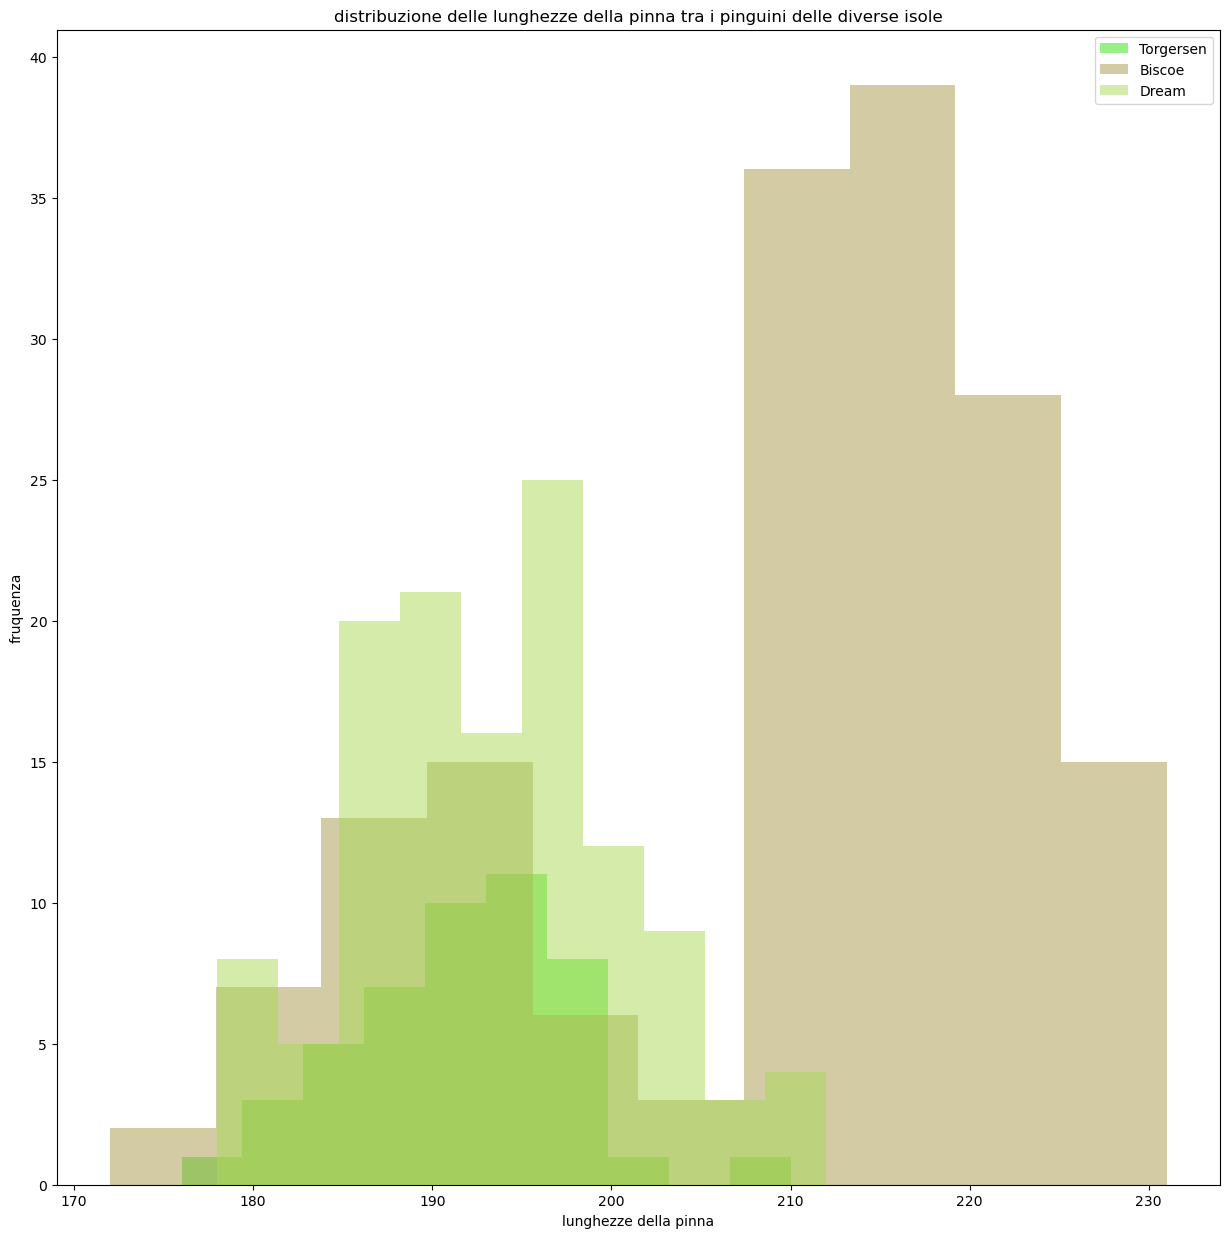

In [79]:
fig, ax=plt.subplots(figsize=(15,15))
for isola in( data_puliti["island"].unique()):
    ax.hist(data_puliti["flipper_length_mm"][data_puliti["island"]==isola].values, color=np.random.uniform(0,1,3), label=isola, alpha=0.5)
    ax.set_title("distribuzione delle lunghezze della pinna tra i pinguini delle diverse isole")
    ax.set_xlabel("lunghezze della pinna")
    ax.set_ylabel("fruquenza")
    ax.legend()
plt.show()
    


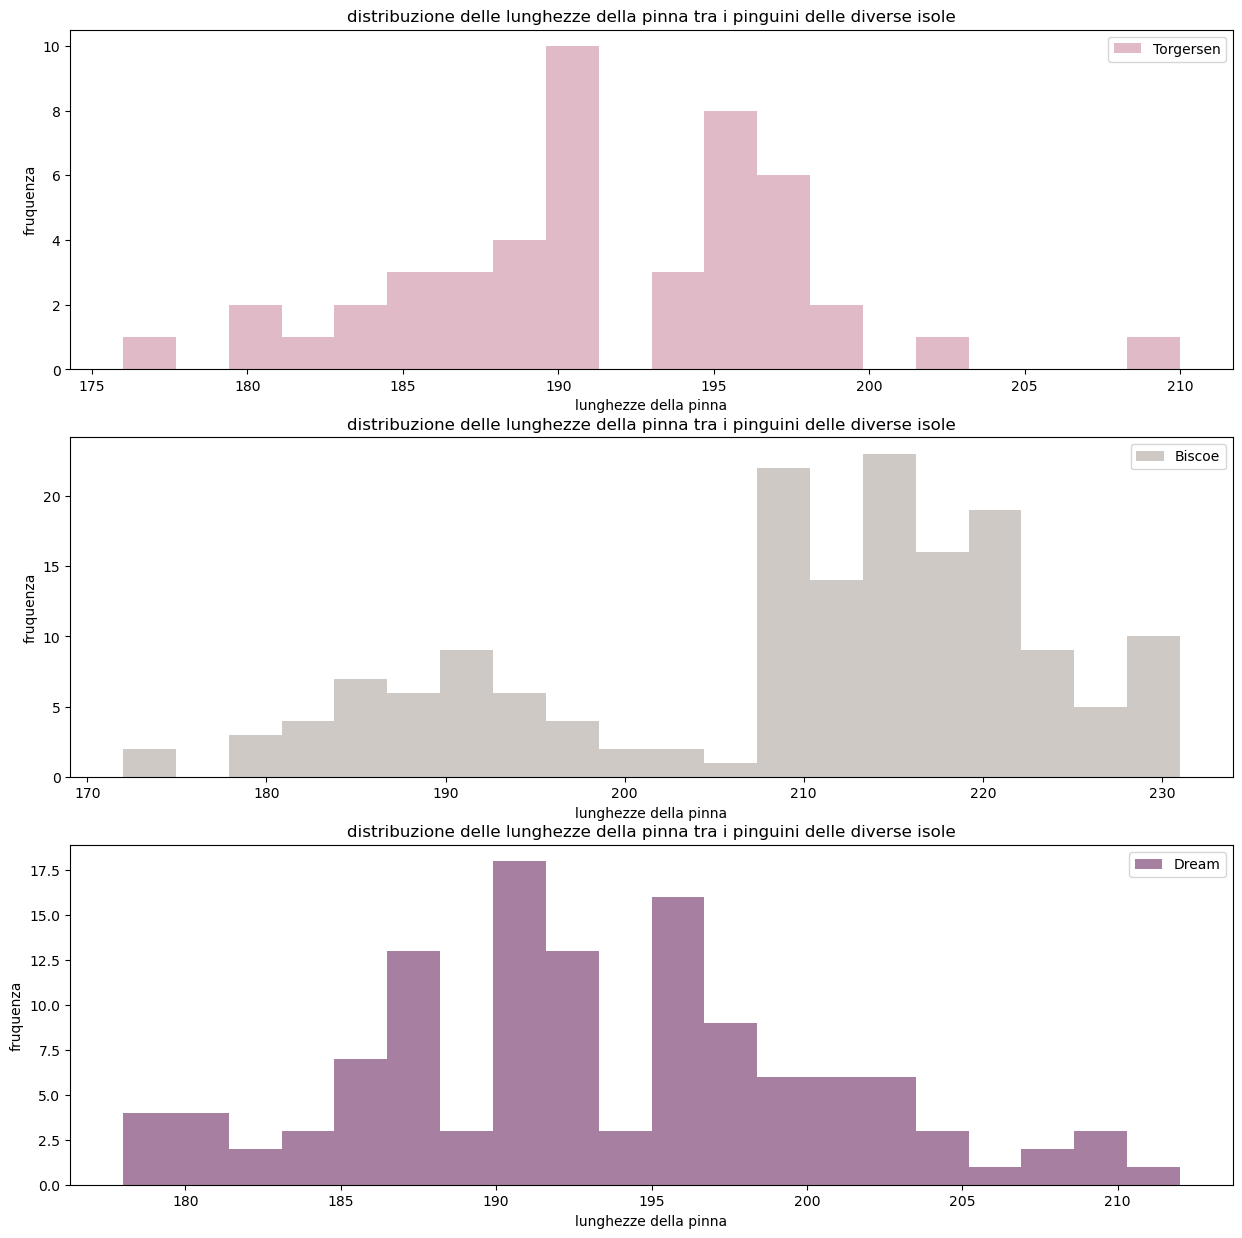

In [83]:
fig, axs=plt.subplots(ncols=1, nrows=3, figsize=(15,15))
for i, isola in enumerate( data_puliti["island"].unique()):
    x=data_puliti["flipper_length_mm"][data_puliti["island"]==isola].values
    axs[i].hist(x, color=np.random.uniform(0,1,3),bins=20, label=isola, alpha=0.5)
    axs[i].set_title("distribuzione delle lunghezze della pinna tra i pinguini delle diverse isole")
    axs[i].set_xlabel("lunghezze della pinna")
    axs[i].set_ylabel("fruquenza")
    axs[i].legend()
plt.show()
    

6. **Correlazione tra caratteristiche:**
   - Calcola la correlazione tra la lunghezza del becco e il peso dei pinguini e visualizza i risultati.


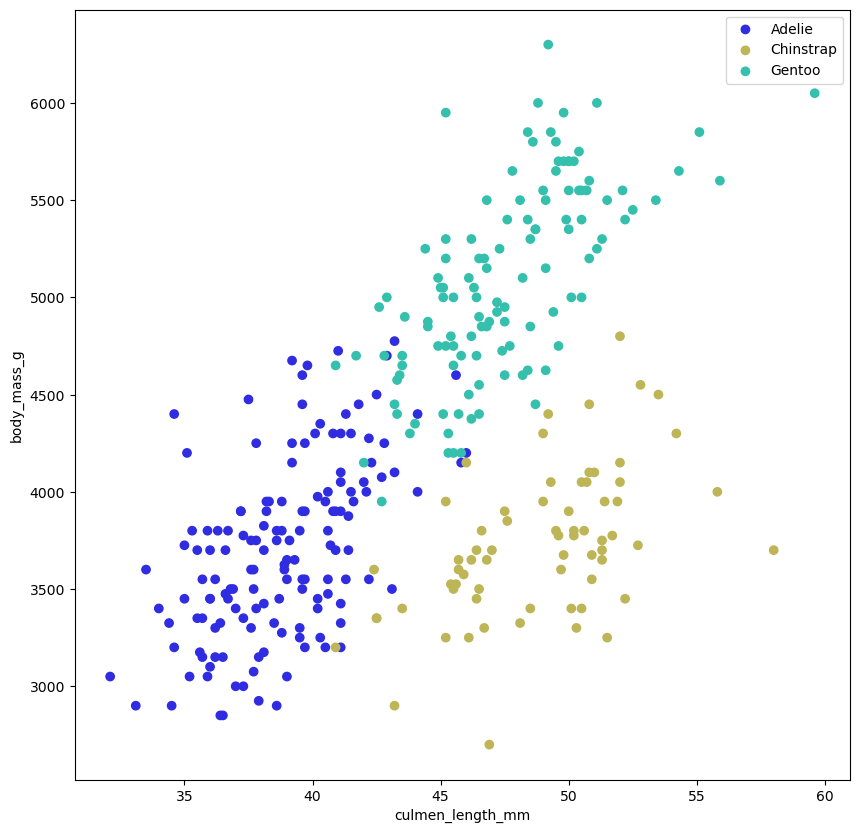

In [106]:
specie_colori={}
colors=[]
for specie in data_puliti["species"]:
    if specie not in specie_colori:
        color=np.random.uniform(0,1,3)
        specie_colori[specie]=color
        colors.append(color)
    else:
        colors.append(specie_colori[specie])

array_colors=np.array(colors)
fig, ax=plt.subplots(figsize=(10,10))
for specie in data_puliti["species"].unique():
    color_specie=array_colors[array_colors==specie_colori[specie]]
    mat_color=np.reshape(color_specie, (-1,3))
    x=data_puliti[data_puliti["species"]==specie]["culmen_length_mm"].values
    y=data_puliti[data_puliti["species"]==specie]["body_mass_g"].values
    
    

    ax.scatter(x ,y, color=mat_color, label=specie)
    ax.set_xlabel("culmen_length_mm")
    ax.set_ylabel("body_mass_g")
    ax.legend()
plt.show()
    

        
    
    


7. **Analisi di distribuzione:**
   - Plotta un istogramma della lunghezza del becco per ogni specie di pinguino.

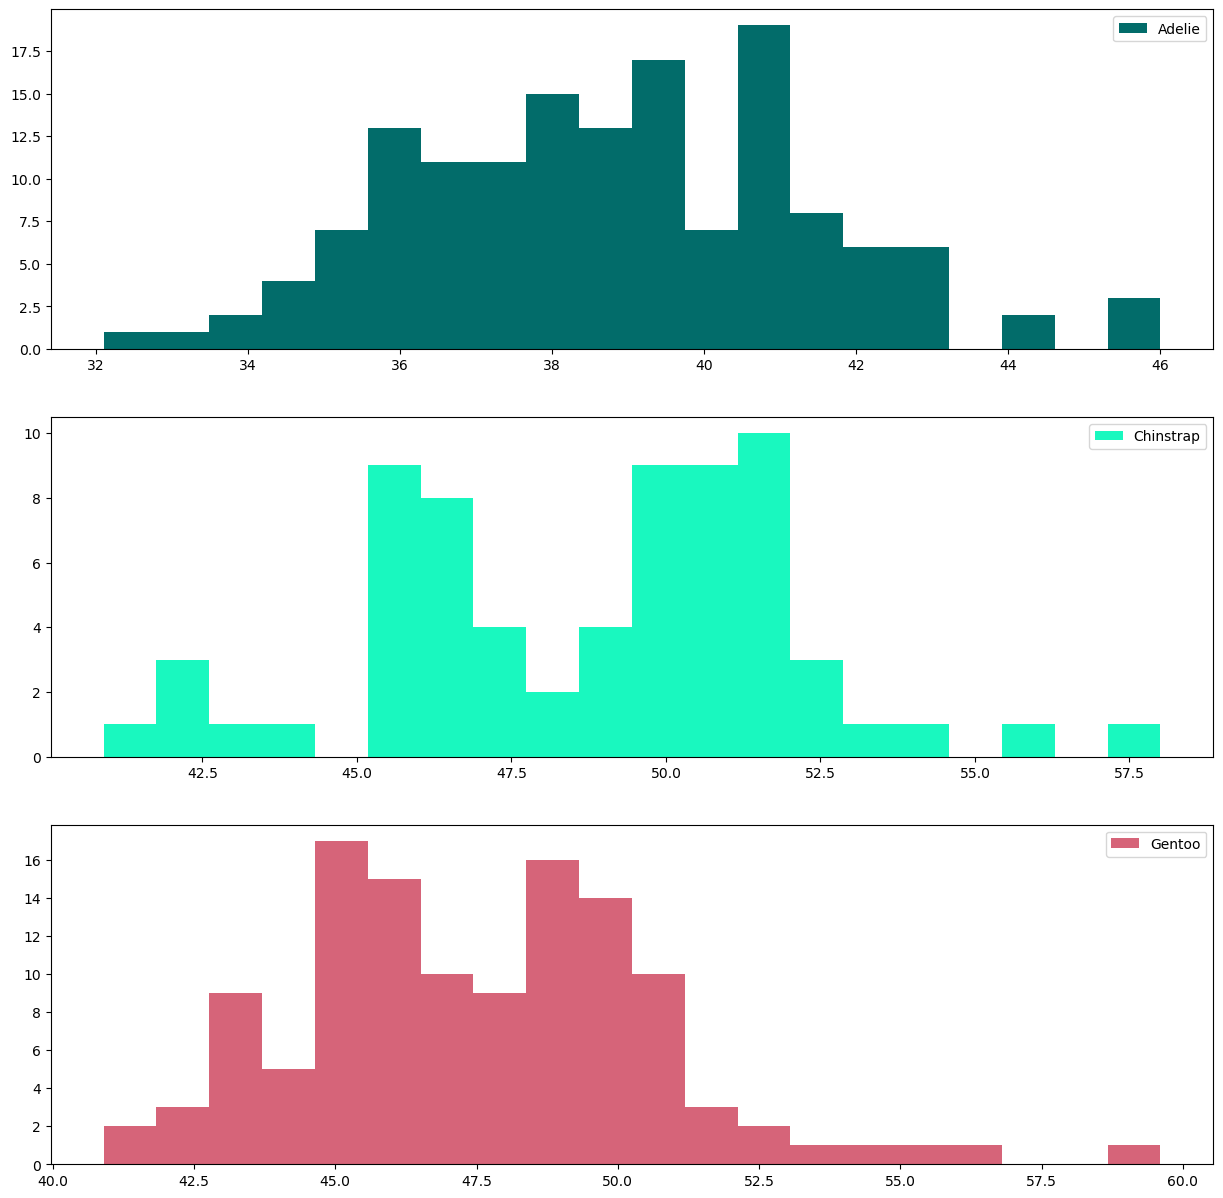

In [113]:
fig, axs=plt.subplots(nrows=len(data_puliti["species"].unique()), ncols=1, figsize=(15, 15))
for i, specie in enumerate(data_puliti["species"].unique()):
    x=data_puliti[data_puliti["species"]==specie]["culmen_length_mm"].values
    axs[i].hist(x, bins=20, label=specie, color=np.random.uniform(0,1,3))
    axs[i].legend()
plt.show()


9. **Raggruppamento per specie e isola:**
   - Raggruppa i dati per specie e isola, quindi calcola la media della lunghezza della pinna.

In [88]:
data_puliti[["species", "island", "flipper_length_mm"]].groupby(["species", "island"]).mean()

flipper_length_mm
species   island                      
Adelie    Biscoe            188.795455
          Dream             189.927273
          Torgersen         191.531915
Chinstrap Dream             195.823529
Gentoo    Biscoe            217.233333

10. **Confronto tra specie:**
    - Plotta un grafico a barre che mostra la media della lunghezza del becco per ciascuna specie di pinguino.

In [ ]:
fig, ax=plt.subplots(nrows=len(data_puliti["species"].unique()), ncols=1, figsize=(15, 15))
for  specie in (data_puliti["species"].unique()):
    x=culmen_length_mm().me
    ax.hist()